# Feature extraction

Features in an image are specific patterns which are unique, can be easily tracked and compared between two or more images. A feature is a piece of information about the content of the image; e.g whether a certain region of the image has certain properties. Features may be specific structures in the image such edges, corners or specific key points.

The data used in this work comes from the Atlas of Digital Pathology (ADP) is a database of Whole Slide Images (WSIs) annotated at the patch level. It is comprised of 17,668 patch images from 100 slides with up to 57 Hierarchical Histological Tissue Types. 

#**Coding session3 -Feature extraction from images 1**

# What shall we cover?
 * Read in single histopathology image
 * Extract edge features
 * Extract corner features   
 * Extract ORB features
 * Practice session: 
   * Read in a histopathology image
   * Extract edges for two values of sigma
   * Compare results 

# Load Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Specify data path

In [ ]:
data_path = '/content/drive/My Drive/colab_notebooks/lp_covid/beta_tested_notebooks/001.png_crop_1729.png'


# 1. Edge detection 

Using edge detection, we can isolate or extract the features of an object. Edge detection is a technique used in computer vision to find the boundaries of an image. This uses an algorithm that searches for discontinuities in pixel brightness in an image that is converted to grayscale.  The points in an image where the brightness changes sharply are sets of curved line segments that are called the edges.

Edge detection is useful in object detection, bio-image analysis, optical character recognition. 

* Edge detection can be used to examine the outline of an image’s boundary and then extract the contents within it and identify the object. 

* It helps to estimate the number, size, shape, or relative location of objects in an image.

* Edge detection allows us to focus on the parts of the image most helpful, while ignoring parts of the image that will not help us.

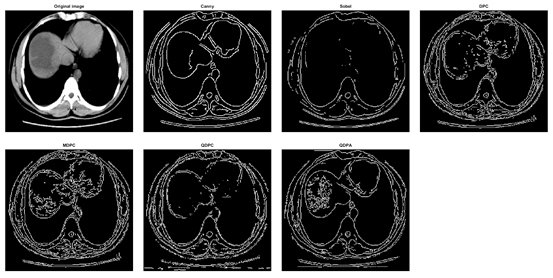

# Canny edge detector

Canny is probably the most commonly used and most effective method for edge detection. It is implemented in the Python library skimage.

It has 3 parameter: a sigma parameter, a low threshold, a high threshold value

# Set up a Canny edge detector with parameters

In [ ]:
import skimage.io
import skimage.feature
import sys
import matplotlib.pyplot as plt

sigma = 2.0
low_threshold = 0.05
high_threshold = 0.3

In [ ]:
print(skimage.__version__)

0.18.3


# Read a histopathology image (in .png format)

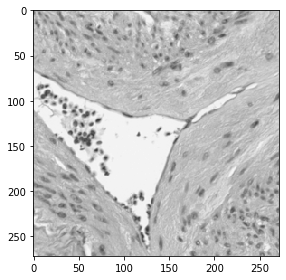

In [ ]:
image = skimage.io.imread(fname=data_path, as_gray=True)  #skimage is a very useful python library for
skimage.io.imshow(image)                                  #Reading, resizing, Upscale / Downscale, rotate, flip, vary intensity, use filters on images
    

# Set Canny parameters

In [ ]:
edges = skimage.feature.canny(
    image=image,
    sigma=sigma,
    low_threshold=low_threshold,
    high_threshold=high_threshold,
)


# Display edges

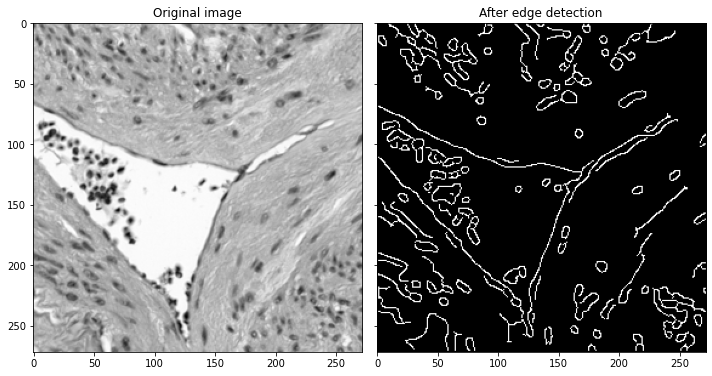

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap ="gray")
ax[0].set_title("Original image")

ax[1].imshow(edges, cmap ="gray")
ax[1].set_title("After edge detection")


fig.tight_layout()
plt.show()

# Define a function for edge detection based on image properties

In [ ]:
def auto_canny(image, sigma=0.001):
    # Compute the median of the single channel pixel intensities
    v = np.median(image)

    # Apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    return cv2.Canny(image, lower, upper)

# Load multiple images and implement the feature extraction

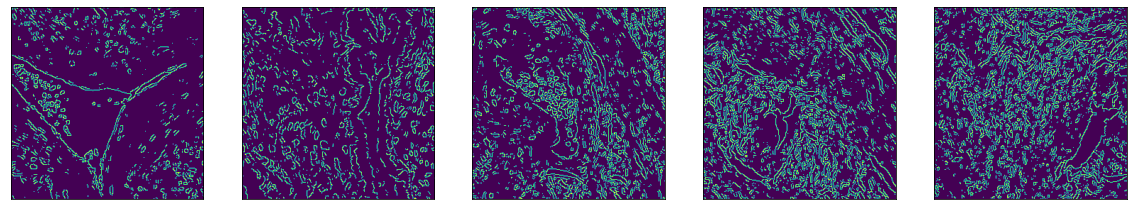

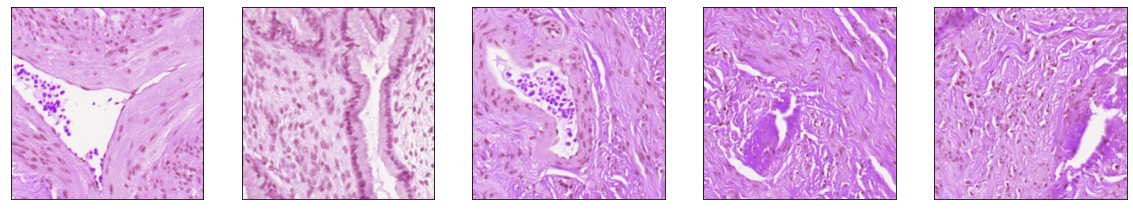

In [ ]:
import glob
import cv2
import matplotlib.image as mpimg

images = []
for img_path in glob.glob('/content/drive/My Drive/colab_notebooks/lp_covid/beta_tested_notebooks/*.png'):
    images.append(cv2.imread(img_path))

plt.figure(1, figsize = (20, 20))
columns = 5
for i, image in enumerate(images):
    canny1 = auto_canny(image)
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)
    plt.imshow(canny1)

    plt.xticks([])
    plt.yticks([])

plt.figure(2, figsize = (20, 20))
columns = 5
for i, image in enumerate(images):
    canny1 = auto_canny(image)
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

    plt.xticks([])
    plt.yticks([])

# 2. Corner detection 

A corner can be defined as the intersection of two edges. It is frequently used in motion detection, image registration, video tracking, 3D reconstruction and object recognition.

Implement a Harris-Corner-detection method

Implemented in OpenCV library

4 parameters:

  * img - Input image- It should be grayscale and float32 type.
  * blockSize - Size of neighbourhood considered for corner detection
  * ksize - Aperture parameter 
  * k - Harris detector free parameter

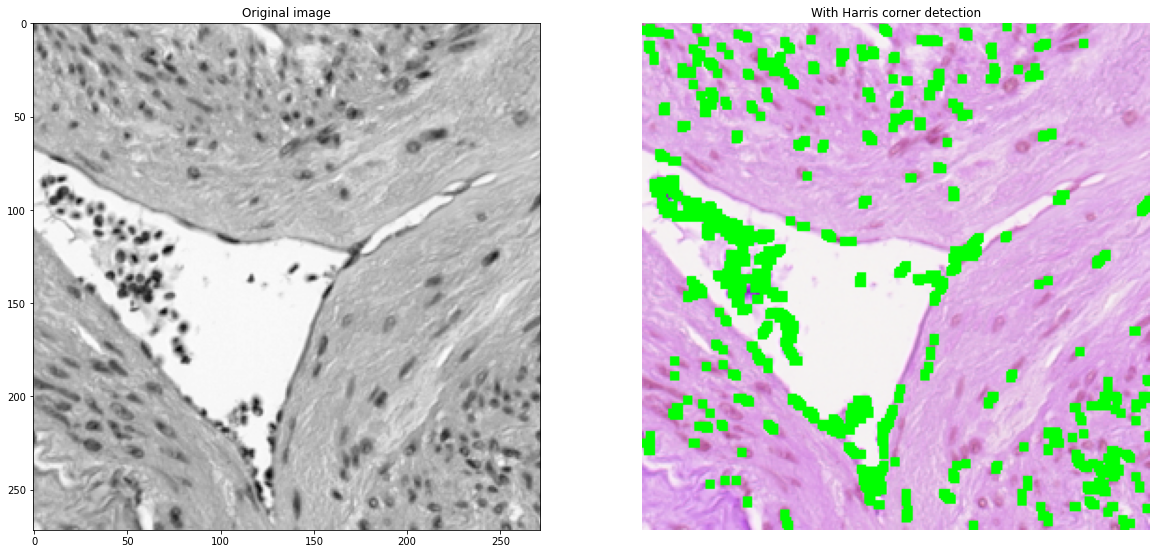

In [ ]:
import cv2
import numpy as np

orig = cv2.imread(data_path, 0)
imgH = cv2.imread(data_path)

grayH = cv2.cvtColor(imgH,cv2.COLOR_BGR2GRAY) 

grayH = np.float32(grayH)

dst = cv2.cornerHarris(grayH,2,9,0.1) #detected corners

dst = cv2.dilate(dst,None, iterations=2) 

# We revert back the original image and speciy the corner color

imgH[dst>0.01*dst.max()]=[0,255,0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20))

ax1.imshow(orig)
ax1.set_title('Original image')
ax2.imshow(imgH)
ax2.set_title('With Harris corner detection')
plt.axis('off')
plt.gray()
plt.show()

#3. ORB feature detection

ORB is a fast robust local feature detector, that can be used in computer vision tasks like object recognition or 3D reconstruction. 

“ORB” stands for “Oriented FAST and rotated BRIEF”. ORB is based on FAST, a feature detector, and BRIEF, a visual descriptor.

The ORB method treats the image as a  multi-scale pyramid. It detects features at each level for better accuracy and rotation /warp invariance.

#Important 
A feature detector chooses points from an image based on some criterion. Typically, an interest point is a local maximum of some function, such as a "cornerness" metric.

A feature descriptor is a vector of values, which somehow describes the image patch around an interest point. It could be as simply the raw pixel values, or more complicated, such as a histogram of gradient orientations.



# Extract ORB features

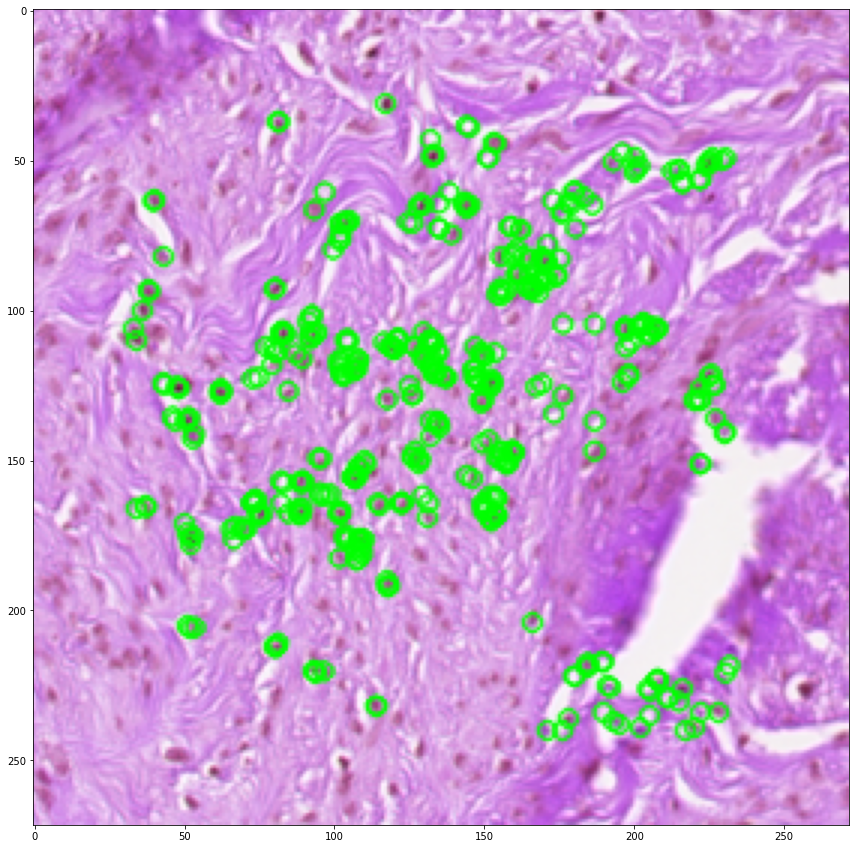

(<matplotlib.image.AxesImage at 0x7fa8031e5ad0>, None)

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv2.imread(img_path)

# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img,None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)

plt.figure(figsize=(15, 15))
plt.imshow(img2), plt.show()

# Feature Matching with ORB Descriptors

Here, we will see a simple example on how to match ORB features between two images. Feature matching is used in image registration, camera calibration and object recognition etc



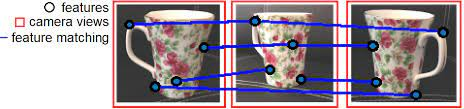



In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
#img1 = cv.imread('box.png',cv.IMREAD_GRAYSCALE)          # queryImage
#img2 = cv.imread('box_in_scene.png',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img,None)
kp2, des2 = orb.detectAndCompute(img,None)

print ("Total matched features:", len(kp1))

Total matched features: 460


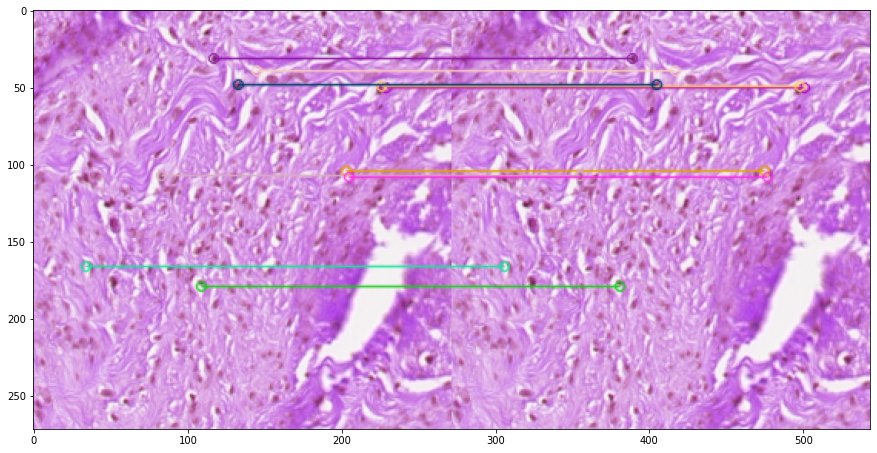

(<matplotlib.image.AxesImage at 0x7fa80329b310>, None)

In [ ]:
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img4 = cv.drawMatches(img,kp1,img,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(15, 15))
plt.imshow(img4),plt.show()

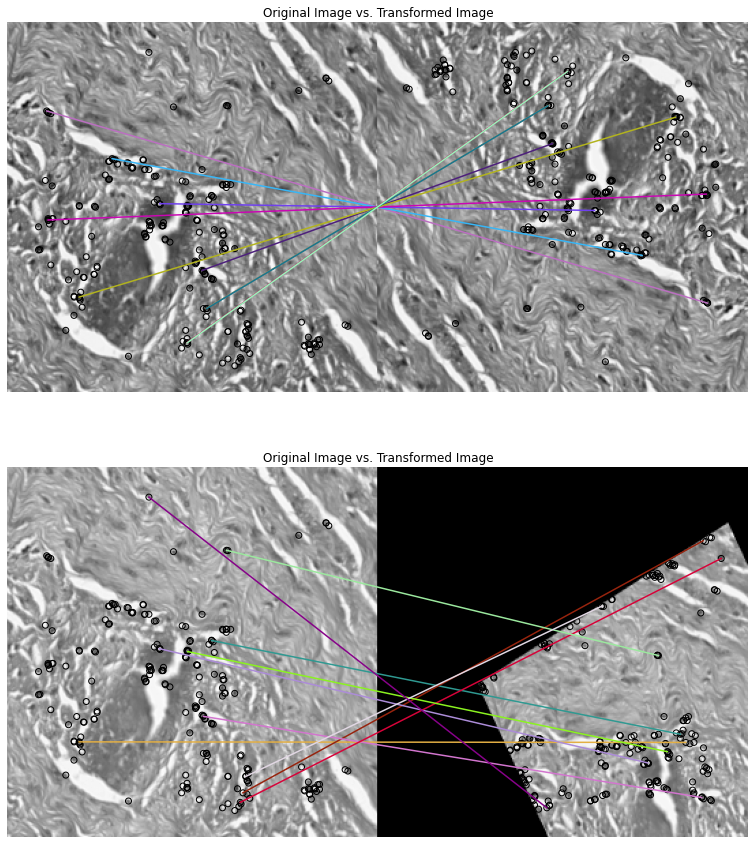

In [ ]:
from skimage import data
from skimage import transform
from skimage.feature import (match_descriptors, corner_harris,
                             corner_peaks, ORB, plot_matches)
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

img1 = cv2.imread('/content/drive/My Drive/colab_notebooks/lp_covid/beta_tested_notebooks/001.png_crop_2473.png')
img1 = rgb2gray(img1)
img2 = transform.rotate(img1, 180)
tform = transform.AffineTransform(scale=(1.3, 1.1), rotation=0.5,
                                  translation=(0, -200))
img3 = transform.warp(img1, tform)

descriptor_extractor = ORB(n_keypoints=200)

descriptor_extractor.detect_and_extract(img1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors  #detect from original image

descriptor_extractor.detect_and_extract(img2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors #detect from rotated image

descriptor_extractor.detect_and_extract(img3)
keypoints3 = descriptor_extractor.keypoints
descriptors3 = descriptor_extractor.descriptors #detect from warped image

matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True) #match -original image with rotated
matches13 = match_descriptors(descriptors1, descriptors3, cross_check=True) #match -original image with warped
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(15, 15) )

plt.gray()

plot_matches(ax[0], img1, img2, keypoints1, keypoints2, matches12[:10])
ax[0].axis('off')
ax[0].set_title("Original Image vs. Transformed Image")

plot_matches(ax[1], img1, img3, keypoints1, keypoints3, matches13[:10])
ax[1].axis('off')
ax[1].set_title("Original Image vs. Transformed Image")


plt.show()


#Practice session
* Read in a histopathology image
* Extract edges for two values of sigma
* Compare results


In [ ]:
import skimage.io
from skimage import data
from skimage import transform
from skimage.feature import (match_descriptors, corner_harris,
                             corner_peaks, ORB, plot_matches)
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

data_path_prac = '/content/drive/My Drive/colab_notebooks/lp_covid/beta_tested_notebooks/001.png_crop_2808.png'
image_prac = skimage.io.imread(fname=data_path_prac, as_gray=True)

sigma = 2.0  # use two values wide apart to test the impact of sigma
low_threshold = 0.05
high_threshold = 0.3

edges = skimage.feature.canny(
    image=image_prac,
    sigma=sigma,
    low_threshold=low_threshold,
    high_threshold=high_threshold,
)

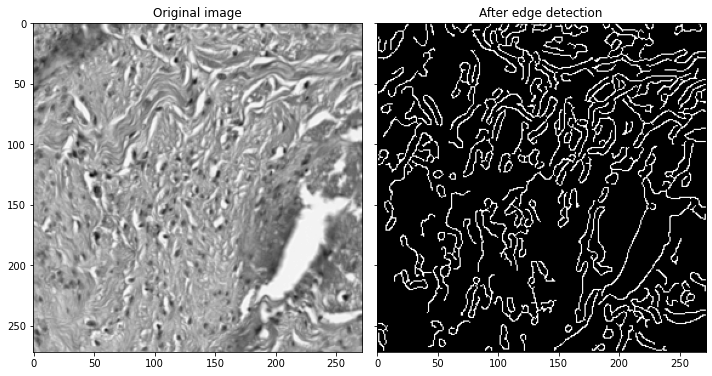

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image_prac, cmap ="gray")
ax[0].set_title("Original image")

ax[1].imshow(edges, cmap ="gray")
ax[1].set_title("After edge detection")


fig.tight_layout()
plt.show()

#**Coding session3 -Feature extraction from images 2**

# Using a Deep learning model for feature extraction

When performing deep learning feature extraction, we use a pre-trained network as a feature extractor, allowing the input image to propagate forward, stopping at pre-specified layer, and taking the outputs of that layer as our features.

With the obtained feature vectors, we can train various machine learning models such as Linear SVM, Logistic Regression, Decision Trees, or Random Forests on top of these features to perform tasks like classification.

Benefits: Deep learning models can be pre-trained with large datasets to perform very well, that is the filters and resulting feature maps will capture useful features. The better the features , the better is for the next stage classifier.




# Load and summarize the VGG16 model. 

In [ ]:
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot

model = VGG16()
model.summary()

553476096/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

We want to access the convolutional layers within the network which are responsible for feature extraction. 

In [ ]:
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


We can retrieve the filters from the second hidden layer as follows:

In [ ]:
# retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights()

In [ ]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# Plot filters

One row for each filter and one column for each channel

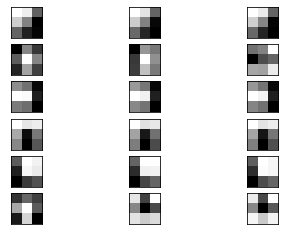

In [ ]:

# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

The activation maps, called feature maps, capture the result of applying the filters to input image.

Visualizing a feature map for a specific input image would help to understand what features of the input are detected or preserved in the feature maps. 

Feature maps close to the input detect small or fine-grained detail, whereas feature maps close to the output of the model capture more general features.

For feature extractio, a part of the VGG16 model will be used.  It would have the same input layer as the original model, but the output would be the output of a given convolutional layer.

In [ ]:
# redefine model to output right after the first hidden layer
from keras.models import Model
model = Model(inputs=model.inputs, outputs=model.layers[1].output)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


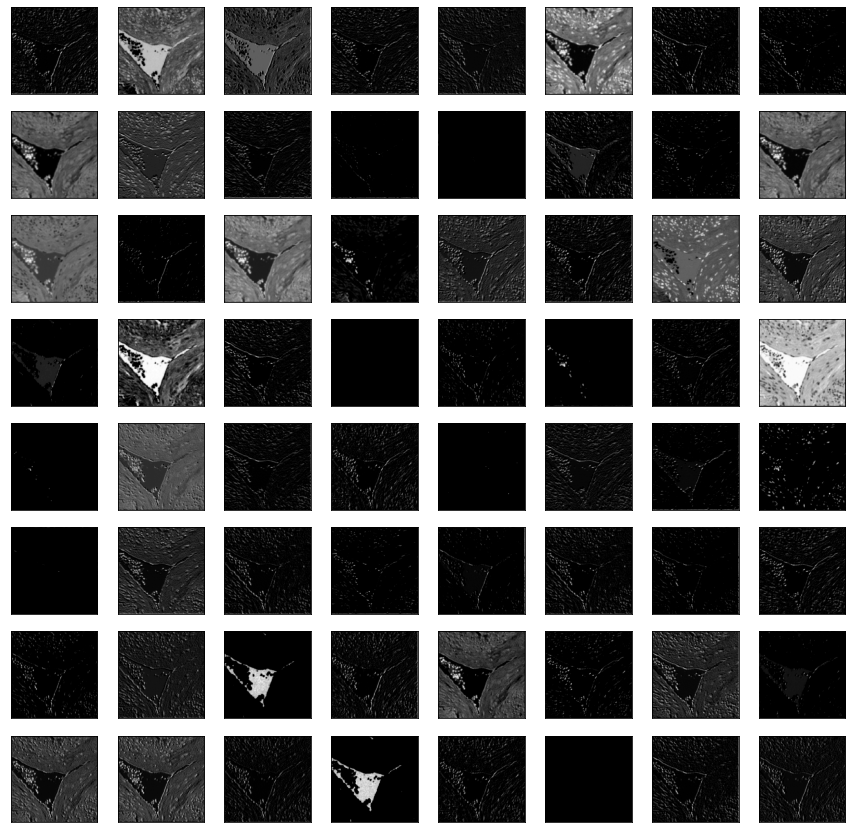

In [ ]:
# plot feature map of first conv layer for given image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims


# load the image with the required shape
img = load_img(data_path, target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
fig, ax = pyplot.subplots(figsize=(15,15))
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
    
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

Visualizing the features from 1st and 17th layer


Features from different layers




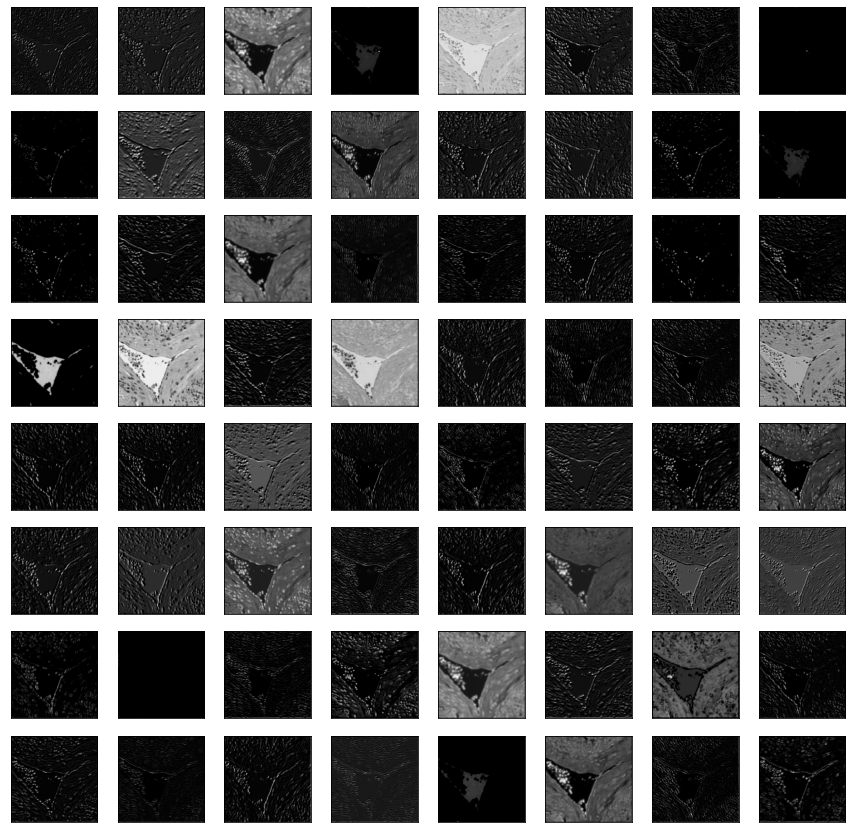


Features from different layers




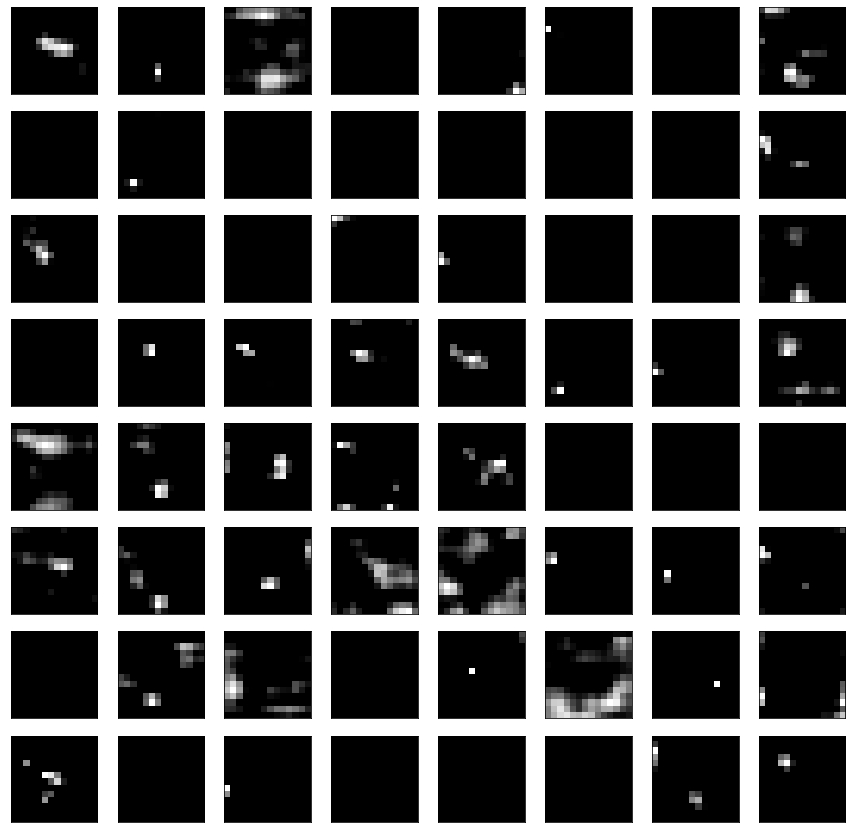

In [ ]:
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
ixs = [2,  17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
img = load_img(data_path, target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
square = 8
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1;fig, ax = pyplot.subplots(figsize=(15,15));print("\nFeatures from different layers");print("\n")
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
      
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	# show the figure
	pyplot.show()

## ***Session 3***
## **Multi-Image Feature Extraction and Unsupervised Clustering**


We will repeat the feature extraction process highlighted in the previous sessions. However, rather than extracting features for a single image, we will now apply the same technique to multiple WSI.

In [ ]:
# Import Libraries
import numpy as np
from numpy import unique, where, savetxt

In [ ]:
import os, shutil, glob, os.path

In [ ]:
from sklearn import datasets, preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, Normalizer, QuantileTransformer, PowerTransformer
from sklearn.decomposition import PCA

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
import keras
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input

In [ ]:
from pyclustertend import hopkins

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Again, we'll load the Visual Graphics Group’s (VGG) transfer learning model - the VGG16 - for feature extraction. The model, which is found in Keras (https://keras.io/), comes complete with pre-trained weights. 

In [ ]:
model = VGG16()

553476096/553467096 [==============================] - 4s 0us/step


We'll then specify the folder/path which contains all images of interest.

In [ ]:
imagePath = '/content/drive/MyDrive/ai4health-data-demos/sample_annotation_data/'

Here, we're creating a pathway for the image type we want to extract. In this instance, we want to load all images that have the PNG format.

In [ ]:
filelist = glob.glob(os.path.join(imagePath, '*.png'))
filelist.sort()

Now, we need to create a global variable and array that will store all the features extracted. As our code iterates through the files within our image path, it will append each image's features to this global variable.

In [ ]:
featurelist = []

Now, we will loop over images, get features, and add each image feature to featurelist array. The overall process can be summarized as follows:


1.   	Loading the image and rescaling every image to the fixed size of 224×224, which is the expected image size for the model
2.   Converting the image to an array of pixel data
3.   Expanding the shape of the array from a 3D array to a 4D array, with its dimensions listed as [samples, rows, columns, channels]
4.   Using VGG16 pre-processing, converting each image to a BGR colour format, and then zero-centring each colour channel without scaling
5.   Extracting the features from each image using the VGG16 model

In [ ]:
for i, imagepath in enumerate(filelist):
    #print("\n[INFO] Loading Image: %s / %s" %(i, len(filelist)), end="\r")
    img = image.load_img(imagepath, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = np.array(model.predict(img_data))
    featurelist.append(features.flatten())

For simplicity, we are going to reassign featurelist to the the new variable X and re-assign it as an array (which was lost when we flattened the features).

In [ ]:
X = np.array(featurelist)
print(X)

[0 1 2]


We can now use this information to first assess cluster tendency. Cluster tendency is a preliminary step in which we identify whether the data can form meaningful clusters based on differing characteristics. Here, we use the Hopkins test to determine whether any meaningful clusters exist in this given dataset. 

**WARNING** pyclustertend was programmed to denote anything close to 0 being an indicator for meaninful clustering. HOWEVER, the original Hopkins statistic has a value range of 0 to 1, where anything close to 1 suggesting good clustering. pyclustertend most likely, instead, used the notation *1-H*, and thus for this reason smaller values using this package suggest better clustering.

To run the Hopkins test, we need to specify the sample size.

In [ ]:
print(hopkins(X,len(X)))

KeyError: ignored

Currently, the fearures remain in their original, untransformed form. In some instances, leaving the data untransformed can result in undiscernible clusters. The figure is an example of this, in which attempts were made to cluster the data in its raw form. 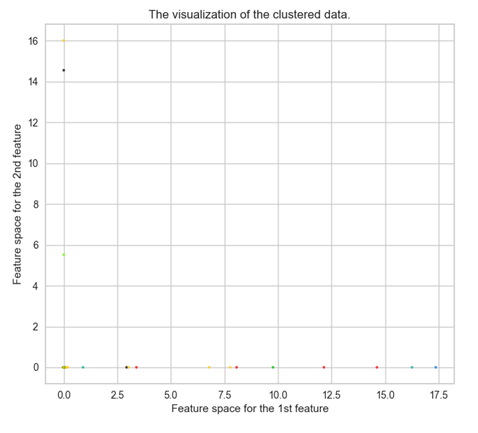

In such instances, various transformations could be trialled to better visualise any potential clusters. Here, to begin with, we're going to try the StandardScaler() coupled with Principal Component Analysis (PCA).

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)
pca = PCA(n_components=3)
X = pca.fit_transform(X)

ValueError: ignored

While the next code is commented out, we will play around with this code further if the above transformations are insufficient for improving the visualization of our clusters.

In [ ]:
##sc = Normalizer()
##X = sc.fit_transform(X)
##pca = PCA(n_components=3)
##X = pca.fit_transform(X)

With the exception of a few clustering methods (e.g., DBSAN) most clustering methods require the end-user specify a cluster number and assesses its validity. However, we do not want to manually keep testing each and every possible cluster value that may be useful. Therefore, we create a for loop in which test several potential cluster numbers. Below, we specify the range of cluster numbers we want to test. Feel free to minimize or extend this as you see fit.

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6]

We then run each of these clusters iteratively. In the below code, we assess each cluster value using the Agglomerative Clustering method - a clustering method typically useful for hierarchical data.

Agglomerative Clustering begins with partitioning the data into single nodes, and step by step merges paired data which are the closest nodes into a new node, until only a single node is left (i.e., the entire dataset).

As each cluster value is assessed within the AgglomerativeClustering() function, the average Silhouette Coefficient (SC), Davies-Bouldin Index (DBI) and Calinski Harabasz Score (CHS) are calculated per cluster and printed in your console. Simultaneously, a plot is created for each cluster, which shows you whether there are visually valuable and differentiable clusters.

In [ ]:
# Iteratively assess both quantitatively and qualitatively each of the cluster numbers
for n_clusters in range_n_clusters:
    # Initialize your plot
    fig, ax = plt.subplots()

    # Initialize the clusterer with n_clusters value and a random generator
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    cluster_labels = clusterer.fit_predict(X)

    # The Silhouette Score, Davies Bouldin Index, and Calinski Harabasz Score give
    # the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("\n-----------------------\n[INFO] n_clusters =", n_clusters,
          "Silhouette Score: {:.2f}".format(silhouette_avg))

    davies_avg = davies_bouldin_score(X, cluster_labels)
    print("[INFO] n_clusters =", n_clusters,
          "Davies Bouldin Index: {:.2f}".format(davies_avg))

    calinski_avg = calinski_harabasz_score(X, cluster_labels)
    print("[INFO] n_clusters =", n_clusters,
          "Calinski Harabasz Score: {:.2f}".format(calinski_avg))


    # Plot each cluster to show how well or poorly the clusters are formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax.scatter(X[:, 0], X[:, 1], marker='*', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    ax.set_xlabel("Feature space for the 1st feature")
    ax.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Visualisation of Agglomerative Clustering on Sample Data "
                  "\nwith n_clusters = %d" % n_clusters),
                 fontsize=12, fontweight='bold')

plt.show()


Now that clustering has been finalised, we can now prepare the feature list for our next task: the ranking of imaging features by importance. For completeness, we will need to add an outcome variable. However, given we are using a publicly available dataset, we do not have any outcome variable available. Therefore, for the purposes of this exercise, we will create one ourselves. The below illustrates the addition of a column in which random integers (range of 1 to 50) are generated as an outcome per image. For simplicity, the outcome is created as the first column.

In [ ]:
X[:,0] = np.random.randint(1, 50, X.shape[0])

We can additionally export these features into a CSV file to be used later. The savetxt function is perfect for this. It is essential to include the option fmt='%f' as otherwise you will have a dataset with scientific notations.

In [ ]:
savetxt('feature_extraction.csv', featurelist, delimiter=',', fmt='%f')

## ***Session 4***
## **Multi-Image Feature Selection and Ranking**


To help with the clustering in **Session 3**, we extracted features from all the images available. We additionally stored those features in a CSV for use in this section. We will now use that CSV to both select and rank the features.  

The feature-based CSV file has no outcome available. However, in order to weight the features, a suitable outcome is required. Given we are playing with test data and do not have a specific outcome of interest, for the purposes of this lesson, an outcome of random values can be generated and automatically added to the CSV file.

In [ ]:
# Import Libraries
from numpy import loadtxt, sort
import numpy as np

from xgboost import XGBClassifier, XGBRegressor, plot_importance

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dense

import matplotlib.pyplot as plt

We also take a momentarily lazy route and use the following code to avoid seeing deprecation warnings that will appear within the xgboost package (i.e., some features within the XGBClassifier are no longer needed).

In [ ]:
import warnings
warnings.filterwarnings("ignore")

We'll load the CSV file we saved earlier, which has the collective images features coupled with the outcome variable we created.

In [ ]:
dataset = loadtxt('feature_extraction.csv', delimiter=",")

We now specify the list of features as the variable X and the outcome variable Y. Given we have so many features we'll focus on the 20 for simplicity, but please feel free to play around with this later in your own time.

In [ ]:
X = dataset[:,1:20]
Y = dataset[:,0]

Now we divide the data into tranining (80%) and test (20%).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=7)

We set the model using the XGBRegressor and train it with our assigned training data. Later, feel free to play around with some of these hyperparameters to see how it'll modify your outcome. For example, you can modify the learning rate.

In [ ]:
model = XGBRegressor(objective="reg:squarederror", colsample_bytree=0.3, learning_rate=0.01, max_depth=6, reg_alpha=15, subsample=0.5)

In [ ]:
model.fit(X_train, y_train, early_stopping_rounds=30, eval_metric=["rmse", "mae"], eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)

We can now plot the features in order of importance, with the top features holding more weight than those towards the base of the plot. xgboost package in Python has it's own plot_importance() feature to use for this.

In [ ]:
plot_importance(model)
plt.show()

We will next extract the features of importance in ascending order.

In [ ]:
thresholds = np.sort(model.feature_importances_)

Next we use SelectFromModel() function from the scikit-learn library for feature selection.

In [ ]:
selection = SelectFromModel(model, threshold=thresholds[2], prefit=True)

We transform all the features using the respective mean and variance (i.e., to center the data or normalize it).

In [ ]:
selected_dataset = selection.transform(X_test)


Finally, we fit the model using using each importance as a threshold. The accuracy values here will tell us what number of features we will need to produce the best model.

In [ ]:
for thresh in thresholds:
	# Select features using threshold
	selection = SelectFromModel(model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	# Train the model
	selection_model = XGBClassifier(eval_metric='mlogloss')
	selection_model.fit(select_X_train, y_train)
	# Evaluate the model
	select_X_test = selection.transform(X_test)
	predictions = selection_model.predict(select_X_test)
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))
